Dataset Used: <a href="https://www.kaggle.com/c/fake-news/data" target="_blank">Here</a>

Labels for Data:

- 0 for Fake News
- 1 for Factual News

In [15]:
# Import required Libraries
import itertools
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Sklearn Library
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

# import Custom Functions
from Functions import *

In [3]:
# Import Dataset
data = pd.read_csv('Project_Dataset/train.csv')
print('Shape:',data.shape)

Shape: (20800, 5)


In [4]:
# Designate Label Data for ease of readability
data.loc[(data['label']==0), ['label']] = 'FAKE'
data.loc[(data['label']==1), ['label']] = 'REAL'
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,REAL
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,FAKE
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",REAL
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,REAL
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,REAL


In [5]:
# Get Target Data
y = data.label
x = data['text'].values.astype('str')

In [6]:
# Split Data: 80% Train, 20% Test set
X_train, X_test, y_train, y_test = split_data(x,y)

Training Sample: (16640,)
Test Sample: (4160,)
Target Training Sample: (16640,)
Target Test Sample: (4160,)


In [7]:
# Fit TFIDF Vectorizer and transform training data(Vectorizer removes punctuation and lowercases data)
fitted_vectorizer, vec_train, vec_test = vectorize(X_train,X_test)

Transformed Train set: (16640, 159125)
Transformed Test set: (4160, 159125)


In [8]:
# Initialize & fit PassiveAggressive Classifier on train data, then make predictions
PassiveAgg_clf = PAclassify(vec_train, y_train)
target_pred = PassiveAgg_clf.predict(vec_test)

# Evaluate model Accuracy
acc_score = accuracy_score(y_test, target_pred)
acc_score = round(acc_score*100,2)
print('Classifier Accuracy:', acc_score,'\n')

Classifier Accuracy: 96.75 



In [18]:
# Examine Results in form of confusion matrix
conf_matr,report = examine_results(y_test, target_pred)
print('Successful Negative Predictions:', conf_matr[0][0])
print('Successful Positive Predictions:', conf_matr[1][1])
print('False Negatives Predicted:', conf_matr[0][1])
print('False Positives Predicted:', conf_matr[1][0],'\n')
print('Classification Report:','\n\n',report)

Successful Negative Predictions: 1988
Successful Positive Predictions: 2037
False Negatives Predicted: 72
False Positives Predicted: 63 

Classification Report: 

               precision    recall  f1-score   support

        FAKE       0.97      0.97      0.97      2060
        REAL       0.97      0.97      0.97      2100

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Confusion matrix, without normalization
% Mislabelled Actual Fakes: 1.73 %


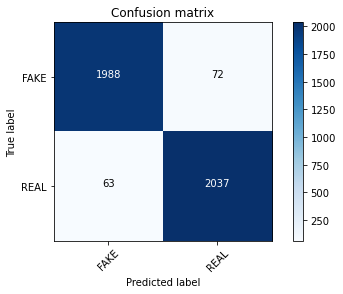

In [23]:
plot_confusion_matrix(conf_matr, classes=['FAKE', 'REAL'])
print('% Mislabelled Actual Fakes:', round(conf_matr[0][1]/y_test.shape[0]*100,2),'%')

In [10]:
# # Save model
# import pickle

# filename = 'Classifier_model_96_8.sav'
# pickle.dump(PassiveAgg_class, open(filename, 'wb'))

In [11]:
# load the model from disk
import pickle
filename = 'Models/Classifier_model_96_8.sav'
loaded_model = pickle.load(open(filename, 'rb'))
print("Model loaded Successfully")

Model loaded Successfully


In [12]:
import gc
collected = gc.collect()
print("Garbage collector: collected","%d objects." % collected) 

Garbage collector: collected 132 objects.
